In [1]:
# run this command, need to install some libraries to make this work
!pip install -r requirements.txt

     |████████████████████████████████| 42.8 MB 1.5 MB/s eta 0:00:01    |▏                               | 215 kB 2.0 MB/s eta 0:00:22| 6.6 MB 5.8 MB/s eta 0:00:07     |█████████████████████████████▎  | 39.2 MB 2.2 MB/s eta 0:00:02
     |████████████████████████████████| 3.2 MB 8.1 MB/s eta 0:00:01
  Created wheel for dlib: filename=dlib-19.21.0-cp36-cp36m-macosx_10_6_intel.whl size=3619749 sha256=4fce6d51536a10598bfc61b59ca190d4a914612e34387abf1b5a8ac20b74682f
  Stored in directory: /Users/jenlin/Library/Caches/pip/wheels/ea/bb/c4/f45d62d3f68968af6f00e44db92994be9053be3923f73c7c82
Successfully built dlib
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.6/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import cv2
import dlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
shape_predictor_location = "./../../shape_predictor_68_face_landmarks.dat" # <== need to download the model from here: https://github.com/AKSHAYUBHAT/TensorFace/blob/master/openface/models/dlib/shape_predictor_68_face_landmarks.dat and place it somewhere. do NOT put it into the repo.

file_location = "./test_images/test_image.jpg"

In [5]:
def get_face_points(img: np.ndarray):
    """
    Given an image represented in a numpy ndarray, returns a list of lists of tuples.
    Each sublist contains two-member tuples representing x, y positions of each facial point for a face,
    the indices corresponding to the appropiate facial point (see point_map.png).

    Params:
        img: A NumPy ndarray. Must be grayscaled.

    Returns:
        A list of lists of tuples.
    """
     
    face_points = []

    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor(shape_predictor_location)
    faces = detector(gray_image)

    for face in faces:
        x1 = face.left() # left point
        y1 = face.top() # top point
        x2 = face.right() # right point
        y2 = face.bottom() # bottom point

        landmarks = predictor(image=gray_image, box=face)
        points = []

        # Loop through all the points
        for n in range(0, 68):
            x = landmarks.part(n).x
            y = landmarks.part(n).y

            points.append((x, y))

        face_points.append(points)

    return face_points

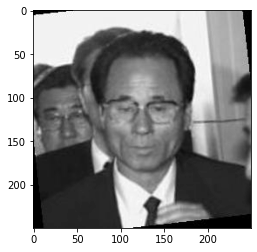

In [50]:
# do NOT put it into the repo
file_location = "./test_images/Bak_Chang-Ryun_0001.jpg"

# Read in image
image = cv2.cvtColor(cv2.imread(file_location), cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_image, cmap='gray')

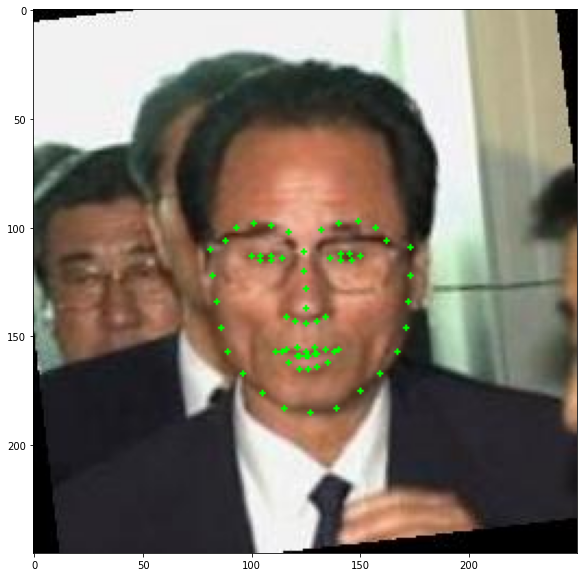

In [51]:
# Visualize points
out_img = np.copy(image)
points = get_face_points(gray_image)

for face in points:
    for x, y in face:
        cv2.circle(img=out_img, center=(x, y), radius=1, color=(0, 255, 0), thickness=-1)

plt.figure(figsize=(10,10))
plt.imshow(out_img, cmap='gray')

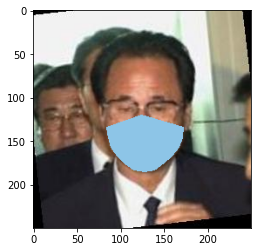

In [52]:
# Get mask indices
mask_idxs = list([x + 2 for x in range(13)])
mask_idxs.append(28)

# Get mask coordinates 
np_points = np.array(points)[0]
mask_pts = np.array([np_points[x] for x in mask_idxs]).astype(np.int32)
mask_pts = mask_pts.reshape((-1, 1, 2)) 

# Draw filled polygon on image
masked_face = cv2.fillPoly(image, [mask_pts], (141,197,231))
plt.imshow(masked_face)

In [34]:
"""
TODO:
- Run this on entire Google facial expression dataset (need to maintain the structure to keep information in proper place, dataset does not go into the repo)
- Try a better method for creating masked faces.
- Feature extraction for emotion detection.
"""


'\nTODO:\n\n- Using get_face_points, block out the appropiate regions of the face with a color.\n- Try this on a set of test images (there are some in the folder already).\n- Run this on entire Google facial expression dataset (need to maintain the structure to keep information in proper place, dataset does not go into the repo)\n- Try a better method for creating masked faces.\n'